In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import Adam


In [104]:
df = pd.read_csv("xAPI-Edu-Data.csv", sep=",")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [105]:

df = df[df["Class"].isin(["H", "L"])]
df["target"] = df["Class"].apply(lambda x: 1 if x == "H" else 0)
df = pd.get_dummies(df, columns=["ParentschoolSatisfaction"], drop_first=True)
X = df[["raisedhands", "VisITedResources", "Discussion", "ParentschoolSatisfaction_Good"]].astype("float32")
y = df["target"].astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)




In [106]:
import tensorflow as tf


model = Sequential([
    Dense(16, activation="relu", input_dim=X_train.shape[1]),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


c:\Users\IPF-2025\Desktop\Regresión-Lineal-TFkeras\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test)
)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5146 - loss: 2.1980 - val_accuracy: 0.6852 - val_loss: 1.3181
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6766 - loss: 1.2123 - val_accuracy: 0.7778 - val_loss: 1.0118
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6421 - loss: 1.1360 - val_accuracy: 0.7963 - val_loss: 0.8036
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7834 - loss: 0.7788 - val_accuracy: 0.8148 - val_loss: 0.6360
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7769 - loss: 0.7538 - val_accuracy: 0.8519 - val_loss: 0.5022
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8007 - loss: 0.4976 - val_accuracy: 0.8704 - val_loss: 0.4522
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8320 - loss: 0.4120 - val_accuracy: 0.8519 - val_loss: 0.4330
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7721 - loss: 0.5904 - val_accuracy: 0.8519 - val_loss

In [108]:

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score
)

y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))
print("\nReporte:\n", classification_report(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Accuracy: 0.9259259259259259
ROC AUC: 0.9505494505494506

Reporte:
               precision    recall  f1-score   support

         0.0       0.96      0.89      0.93        28
         1.0       0.89      0.96      0.93        26

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



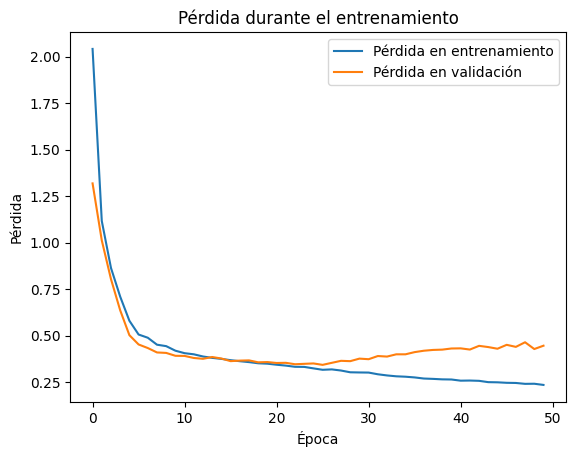

In [109]:
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [128]:
cols = ['raisedhands', 'VisITedResources', 'Discussion', 'ParentschoolSatisfaction_Good']

# Ejemplo de nueva muestra con valores que respetan la escala de tus datos
# Recuerda que ParentschoolSatisfaction_Good debe ser 0 o 1 (codificado)
nueva_muestra = pd.DataFrame([[90, 81, 91,0]], columns=cols).astype("float32")

# Hacer la predicción
probabilidad = model.predict(nueva_muestra)[0][0]


print("Predicción:", "No abandona" if probabilidad < 0.5 else "No abandona")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicción: No abandona
